<p style="font-size:30px; text-align:center; padding:50px 70px;font-weight:bolder;background-color:gold;border-radius:20px">Gold Rates Prediction using Machine Learning


>  Historically gold coinage was widely used as currency; when paper money was introduced, it typically was a receipt redeemable for gold coin or bullion. In a monetary system known as the gold standard, a certain weight of gold was given the name of a unit of currency. For a long period, the United States government set the value of the US dollar so that one troy ounce was equal to 20.67 (0.665 per gram), but in 1934 the dollar was devalued to 35.00 per troy ounce (0.889/g). By 1961, it was becoming hard to maintain this price, and a pool of US and European banks agreed to manipulate the market to prevent further currency devaluation against increased gold demand.

> On 17 March 1968, economic circumstances[clarification needed] caused the collapse of the gold pool, and a two-tiered pricing scheme was established whereby gold was still used to settle international accounts at the old 35.00 per troy ounce (1.13/g) but the price of gold on the private market was allowed to fluctuate; this two-tiered pricing system was abandoned in 1975 when the price of gold was left to find its free-market level.[citation needed] Central banks still hold historical gold reserves as a store of value although the level has generally been declining.[citation needed] The largest gold depository in the world is that of the U.S. Federal Reserve Bank in New York, which holds about 3% of the gold known to exist and accounted for today, as does the similarly laden U.S. Bullion Depository at Fort Knox. In 2005 the World Gold Council estimated total global gold supply to be 3,859 tonnes and demand to be 3,754 tonnes, giving a surplus of 105 tonnes.

> After 15 August 1971 Nixon shock, the price began to greatly increase, and between 1968 and 2000 the price of gold ranged widely, from a high of 850 per troy ounce (27.33/g) on 21 January 1980, to a low of 252.90 per troy ounce (8.13/g) on 21 June 1999 (London Gold Fixing). Prices increased rapidly from 2001, but the 1980 high was not exceeded until 3 January 2008, when a new maximum of 865.35 per troy ounce was set. Another record price was set on 17 March 2008, at 1023.50 per troy ounce (32.91/g).

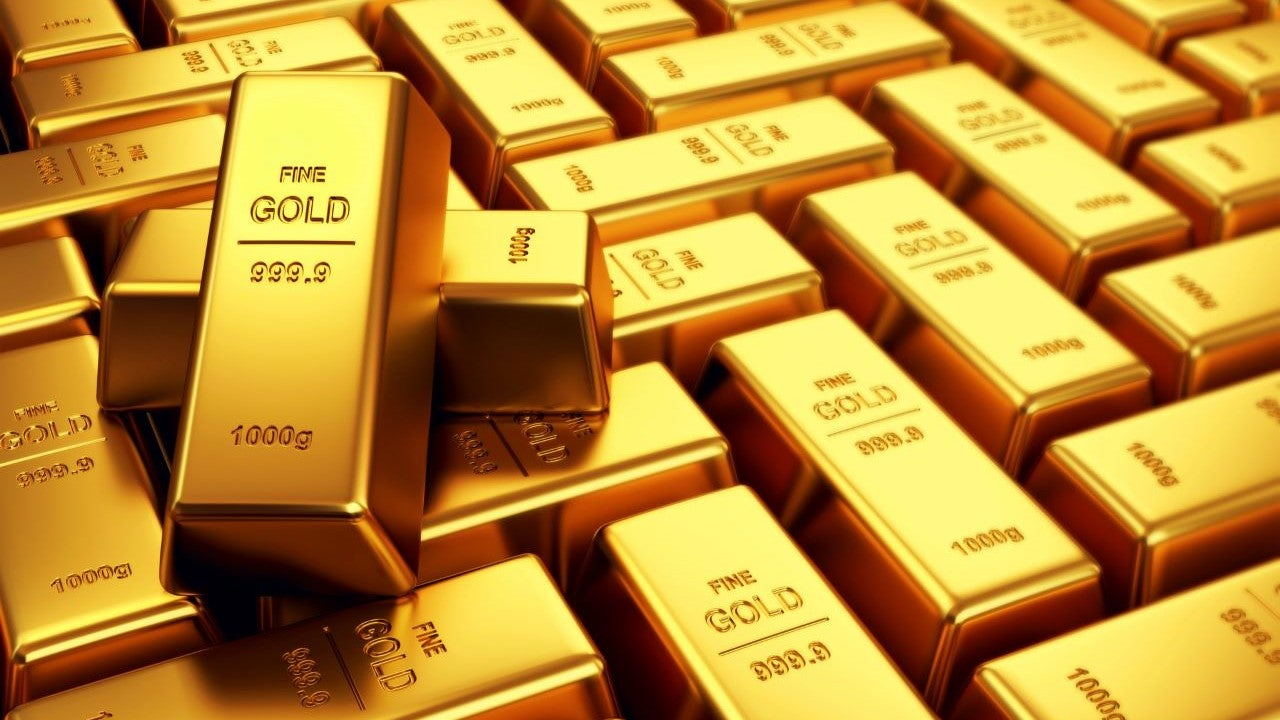

<p style="font-size:30px; text-align:center; padding:20px 70px;font-weight:bolder;background-color:gold;border-radius:10px">About The Data


> Data Overview: This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.


<b><font size="5" color='Blue'>Import The Main Libraries</font></b>

In [1]:
# Most important
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# other
import missingno as msno
import os

 <b><font size="5" color='Blue'>Load The DataSet</font></b>


In [2]:
## Read the Csv file
data = pd.read_csv("gld_price_data.csv")

In [3]:
df =data.copy()

<b><font size="5" color='Blue'>Inspect The Data</font></b>

In [4]:
# Show the head of the dataFrame 
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.shape

(2290, 6)

### Conclusion
> So, we have 2290 records in the dataset and 6 columns including EUR/USD which is our target variable.

<b><font size="5" color='Blue'>Checking Missing Values</font></b>


In [6]:
## check nulls of data 
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Conclusion
> Their is no nulls in the dataset

<b><font size="5" color='Blue'>Columns in Dataset</font></b>


In [7]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

<b><font size="5" color='Blue'>Summary statistics of Data</font></b>


In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<b><font size="5" color='Blue'>Information about coulmns</font></b>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


<p style="font-size:30px; text-align:center; padding:20px 70px;font-weight:bolder;background-color:gold;border-radius:10px">Analysis of The Data


In [10]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 <b><font color='red' size=6>Split data</font></b>

In [11]:
x = df.drop(["Date","GLD"],axis=1).values
y= df['EUR/USD'].values

<b><font color='red' size=6>train test split</font></b>

In [12]:
# import the train_test_split
from sklearn.model_selection import train_test_split

In [13]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42,shuffle=True)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1717, 4)
(573, 4)
(1717,)
(573,)


<p style="font-size:30px; text-align:center; padding:20px 70px;font-weight:bolder;background-color:gold;border-radius:10px">Random Forest Regression



In [15]:
from sklearn.ensemble import RandomForestRegressor
regr_1 = RandomForestRegressor(n_estimators=100)

# training the model
regr_1.fit(x_train,y_train)

# prediction on Test Data
y_1 = regr_1.predict(x_test)

df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_1})

<b><font color='red' size=6>Plot the actual vers the predicted</font></b>

In [16]:
plt.figure(figsize=(8,4))
plt.plot(df_1[:50])
plt.legend(["Actualy","predicted"]);


<b><font size="5" color='red'>Random Forest Evaluation</font></b>


In [17]:
# calculate r2_score for the model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
DT_score = r2_score(y_test,y_1)
DT_score

0.9999818557486453

In [18]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-DT_score)*(n-1)/(n-p-1)
adj_r2

0.9999818133555346

In [19]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < DT_score

True

In [20]:
# calculate mean_squared_error
DT_mse = mean_squared_error(y_test , y_1)
DT_mse

3.338156282439504e-07

In [21]:
# calculate mean_absolute_error
DT_mae = mean_absolute_error(y_test , y_1)
DT_mae

0.00023669710296687012

In [22]:
# calculate mean_absolute_percentage_error
DT_mape = mean_absolute_percentage_error(y_test , y_1)
DT_mape

0.00018203362902231103

In [23]:
# calculate root_mean_squared_error
DT_mse = mean_squared_error(y_test , y_1)
DT_rmse = np.sqrt(DT_mse)
DT_rmse

0.0005777677978599624

<p style="font-size:30px; text-align:center; padding:50px 70px;font-weight:bolder;background-color:gold;border-radius:20px">Hope You Like This Kernel.<br> <p style="font-size:80px; text-align:center; padding:30px 70px;font-weight:bolder;">Thank You


